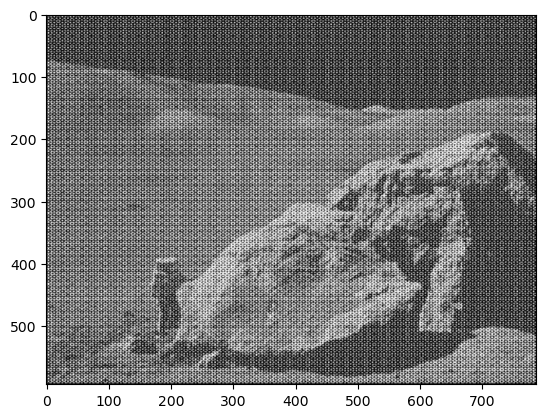

In [53]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.feature import peak_local_max

# Загрузка изображения
img = cv2.imread('periodic_noise_1.JPG', cv2.IMREAD_GRAYSCALE)

plt.imshow(img, cmap='gray')


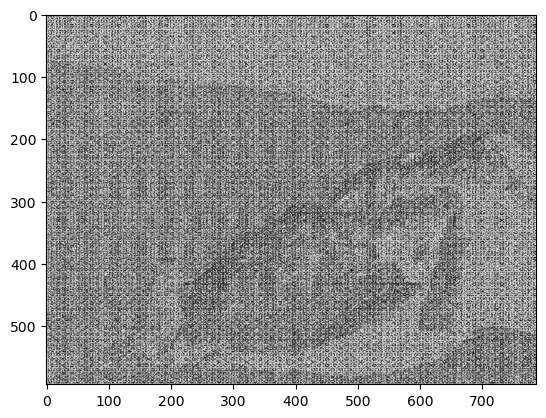

In [54]:
# 1. Высокочастотная фильтрация на основе ядра Гаусса
# Создаем гауссовский фильтр низких частот
gaussian_blur = cv2.GaussianBlur(img, (15, 15), 0)
# Вычитаем размытое изображение из оригинала (усиление высоких частот)
high_freq_img = img - gaussian_blur


# Нормализация результатов
high_freq_img = cv2.normalize(high_freq_img, None, 0, 255, cv2.NORM_MINMAX)

# Вывод результатов

plt.imshow(high_freq_img, cmap='gray')

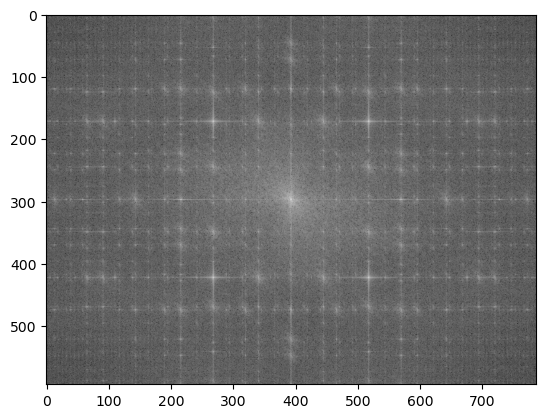

In [50]:
dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

plt.imshow(magnitude_spectrum, cmap='gray')


/tmp/ipykernel_91742/1887400969.py:7: RuntimeWarning: divide by zero encountered in log
  filtering_magn_res = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))


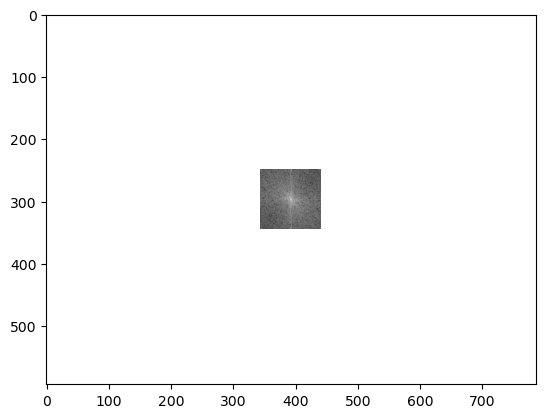

In [51]:
mask = np.zeros((img.shape[0],img.shape[1],2),np.uint8)
centerX, centerY = (int(img.shape[0] / 2),int(img.shape[1] / 2))
mask[centerX-50:centerX+50, centerY - 50:centerY+50,:] = 1

dft_shift = dft_shift*mask

filtering_magn_res = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
plt.imshow(filtering_magn_res, cmap='gray')

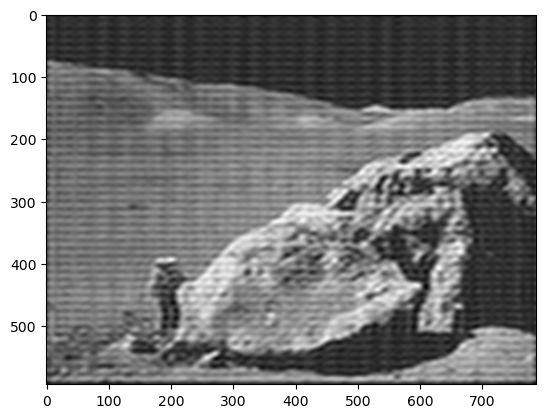

In [52]:

f_ishift = np.fft.ifftshift(dft_shift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])
plt.imshow(img_back, cmap = 'gray')

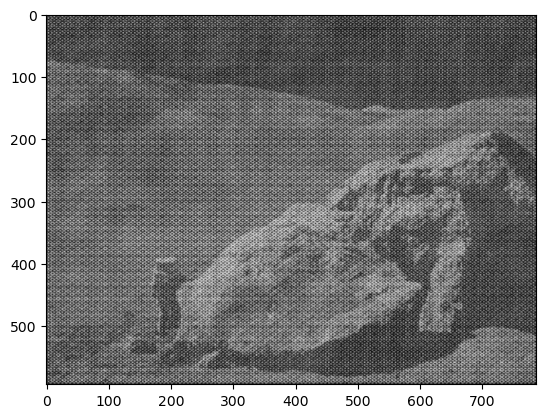

In [57]:
dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
shift = np.fft.fftshift(dft)

magnitude_spectrum1 = 20 * np.log(cv2.magnitude(shift[:, :, 0], shift[:, :, 1]))
local_max = peak_local_max(magnitude_spectrum1, min_distance=15, threshold_abs=200)

rows, cols = img.shape
mask1 = np.copy(shift)
mask1[:, :, :] = 1

for i in local_max:
    r = np.int32(((i[0] - rows // 2) ** 2 + (i[1] - cols // 2) ** 2) ** (1 / 2))
    cv2.circle(mask1, (rows // 2, cols // 2), r, (0, 0))

shift = dft_shift * mask1

fshift = np.fft.ifftshift(shift)
img_back1 = cv2.idft(fshift)
img_back1 = cv2.magnitude(img_back1[:, :, 0], img_back1[:, :, 1])

plt.imshow(img_back1, cmap='gray')
